# Pima diabetes Tree

In [17]:
# decision tree algorithm
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Loading Data: Pima Indian Diabetes dataset
'''
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
'''
url = "https://goo.gl/bDdBiA"
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv(url, names=col_names)

pima.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

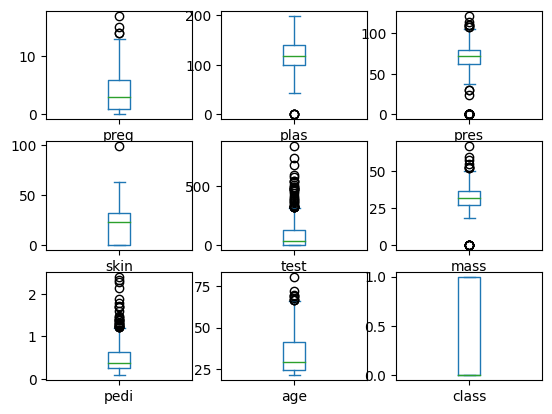

In [18]:
# Statistical Summary: descriptions
print(pima.describe())
# Univariate (one variable):
# box and whisker plots
pima.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

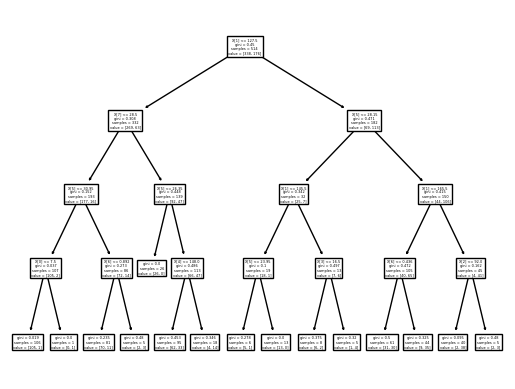

In [19]:
#Feature Selection: divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)
'''
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
'''

array = pima.values
# separate array into input and output components
X = array[:,0:8]
y = array[:,8]

#Splitting Data: dividing the dataset into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
seed = 7
validation_size = 0.33
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_validation)

from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [20]:
#Evaluating Model: estimate, how accurately the classifier or model can predict the type of cultivars.
#Accuracy in terms of 'classification rate' can be computed by comparing actual test set values and predicted values.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_validation, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_validation,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[140  22]
 [ 47  45]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       162
         1.0       0.67      0.49      0.57        92

    accuracy                           0.73       254
   macro avg       0.71      0.68      0.68       254
weighted avg       0.72      0.73      0.72       254

Accuracy: 0.7283464566929134


In [21]:
#Visualizing Decision Trees
#export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

from six import StringIO

dot_data = StringIO()

dot_data = export_graphviz(clf, out_file=None,feature_names = col_names[0:8], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)

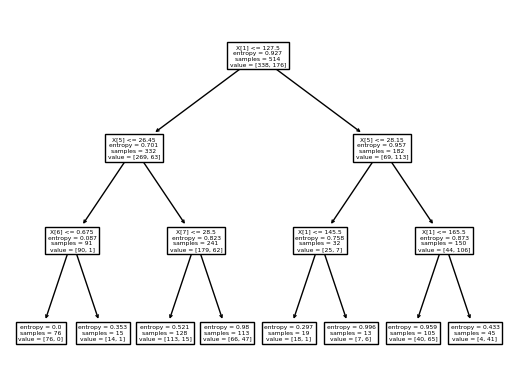

In [22]:
#graph
from IPython.display import Image
from pydotplus import graph_from_dot_data

#graph = graph_from_dot_data(dot_data.getvalue())
#graph.write_png('diabetes.png')
#Image(graph.create_png())


#Optimizing Decision Tree Performance
# criterion : optional (default=”gini”), “gini” for the Gini index and “entropy” for the information gain.
# splitter : string, optional (default=”best”) or Split Strategy: “best” to choose the best split and “random” to choose the best random split
# max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The higher value of maximum depth causes overfitting, and a lower value causes underfitting
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_validation)

tree.plot_tree(clf)
plt.show()

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.7401574803149606


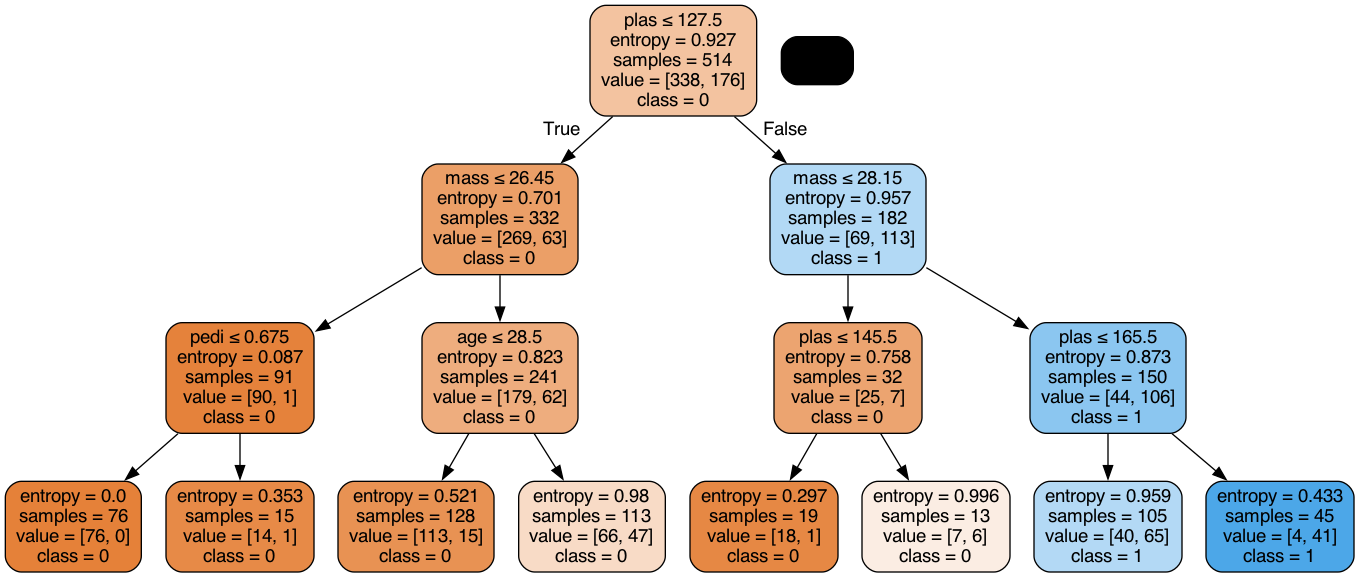

In [24]:
# Visualizing Decision Trees
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = col_names[0:8], class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Graph/Pima_diabetes_Tree.png')
Image(graph.create_png())